## Data Exploration Tweet

Coded by: Rina Yulius

### Objectives

1. To get the insight about:
a) how many total or comparison of tweets that contain abusive words/hate speech from all the tweets in the dataset (data.csv)?
b) who is the target of the hate speech tweets 
c) what topics are most frequently discussed
d) what is the level of hate speech in tweets?
2. To visualize the dataset


## Import Library

In [49]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px

## Read Data Alay

In [9]:
df_alay = pd.read_csv('alay.csv', encoding='latin-1')

#print info df_alay
print(df_alay.head())
print("\n")
print(df_alay.info())
print("\n")
print(df_alay.describe())
print("\n")
print(df_alay.isnull().sum())

  anakjakartaasikasik anak jakarta asyik asyik
0        pakcikdahtua        pak cik sudah tua
1      pakcikmudalagi        pak cik muda lagi
2         t3tapjokowi             tetap jokowi
3                  3x                tiga kali
4              aamiin                     amin


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15166 entries, 0 to 15165
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   anakjakartaasikasik       15166 non-null  object
 1   anak jakarta asyik asyik  15166 non-null  object
dtypes: object(2)
memory usage: 237.1+ KB
None


       anakjakartaasikasik anak jakarta asyik asyik
count                15166                    15166
unique               15166                     8638
top           pakcikdahtua                     wkwk
freq                     1                      100


anakjakartaasikasik         0
anak jakarta asyik asyik    0
dtype: int64


## Read Data Abusive

In [10]:
df_abusive = pd.read_csv('abusive.csv', encoding='latin-1')

#print info df_alay
print(df_abusive.head())
print("\n")
print(df_abusive.info())
print("\n")
print(df_abusive.describe())
print("\n")
print(df_abusive.isnull().sum())

   ABUSIVE
0     alay
1    ampas
2     buta
3  keparat
4   anjing


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ABUSIVE  125 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB
None


       ABUSIVE
count      125
unique     125
top       alay
freq         1


ABUSIVE    0
dtype: int64


## Read Data Tweet

In [67]:
df_tweet = pd.read_csv('data.csv', encoding='latin-1')
#print info
print(df_tweet.head())
print("\n")
print(df_tweet.info())
print("\n")
print(df_tweet.describe())
print("\n")
print(df_tweet.isnull().sum())

# Remove duplicated data

df_tweet = df_tweet.drop_duplicates()

# Sanity check

df_tweet.duplicated().sum()

                                               Tweet  HS  Abusive  \
0  - disaat semua cowok berusaha melacak perhatia...   1        1   
1  RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4  USER USER Kaum cebong kapir udah keliatan dong...   1        1   

   HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0              1         0            0        0            0          0   
1              0         0            0        0            0          0   
2              0         0            0        0            0          0   
3              0         0            0        0            0          0   
4              0         1            1        0            0          0   

   HS_Other  HS_Weak  HS_Moderate  HS_Strong  
0         1        1            0          0  
1         0        0            0 

0

## Data Manipulation

In [68]:
range(df_tweet.shape[0])

range(0, 13044)

In [69]:
df_tweet_filtered = df_tweet.drop('Tweet', axis=1, inplace= False)
df_tweet_filtered.head()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,1,1,1,0,0,0,0,0,1,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,1,0,0,0,0,0,1,0


## Classify the Tweet

if the tweet is considered as hate speech then label as 1, else 0

In [70]:
def classify(HS):
    if (HS == 1):
        return 'Yes'
    elif (HS == 0):
        return 'No'

def classify(Abusive):
    if (Abusive == 1):
        return 'Yes'
    elif (Abusive == 0):
        return 'No'
    
df_tweet['Tipe klasifikasi HS'] = df_tweet['HS'].apply(lambda x: classify(x))
df_tweet['Tipe klasifikasi Abusive']= df_tweet['Abusive'].apply(lambda x: classify(x))
df_tweet.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Tipe klasifikasi HS,Tipe klasifikasi Abusive
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,Yes,Yes
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,No,Yes
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,No,No
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,No,No
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,Yes,Yes


In [71]:
classify = df_tweet[["Tweet", "HS", "Abusive", "Tipe klasifikasi HS", "Tipe klasifikasi Abusive"]]
classify.head()

,Tweet,HS,Abusive,Tipe klasifikasi HS,Tipe klasifikasi Abusive
0,- disaat semua cowok berusaha melacak perhatia...,1,1,Yes,Yes
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,No,Yes
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,No,No
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,No,No
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,Yes,Yes


In [72]:
classify['Tipe klasifikasi HS'].value_counts()

No     7526
Yes    5518
Name: Tipe klasifikasi HS, dtype: int64

## Create the Visualization

create diagram based on the classification (whether the tweet consists hate speech/abusive or not)

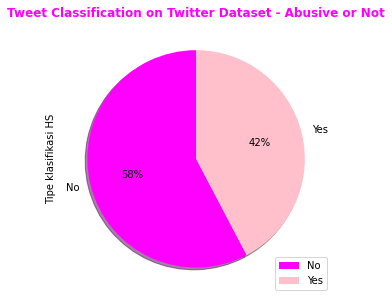

In [81]:
classify['Tipe klasifikasi HS'].value_counts().plot(kind='pie', figsize=(5,5), autopct='%1.f%%', startangle=90, shadow=True, colors = ['magenta','pink'])

plt.legend(['No', 'Yes'])
plt.title('Tweet Classification on Twitter Dataset - Abusive or Not', loc='center',color='magenta', fontweight='bold')

plt.show()

In [43]:
#Type of Abusive Tweet

type_HS = df_tweet[["Tweet", "HS", "HS_Individual", "HS_Group", "HS_Religion", "HS_Race", "HS_Physical", "HS_Gender", "HS_Other", "HS_Weak", "HS_Moderate", "HS_Strong"]]
type_HS.sum() 

Tweet            - disaat semua cowok berusaha melacak perhatia...
HS                                                            5561
HS_Individual                                                 3575
HS_Group                                                      1986
HS_Religion                                                    793
HS_Race                                                        566
HS_Physical                                                    323
HS_Gender                                                      306
HS_Other                                                      3740
HS_Weak                                                       3383
HS_Moderate                                                   1705
HS_Strong                                                      473
dtype: object

In [76]:
# Create new column for negative tweet target

def target(x):
    if x['HS_Individual'] == 1 and x['HS_Group'] == 1:
        return 'Both'
    elif x['HS_Individual'] == 1 and x['HS_Group'] == 0:
        return 'Individual'
    elif x['HS_Individual'] == 0 and x['HS_Group'] == 1:
        return 'Group'
    else:
        return 'None'

df_tweet['Target'] = df_tweet.apply(target, axis=1)

In [77]:
# Tweet target classification

filter = df_tweet['Target'] == 'None'
df_tweet[~filter]['Target'].value_counts()

Individual    3540
Group         1978
Name: Target, dtype: int64

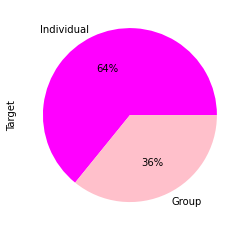

In [92]:
# Visualization

df_tweet[~filter]['Target'].value_counts().plot.pie(autopct='%1.0f%%', colors = ['magenta','pink'])
plt.show()

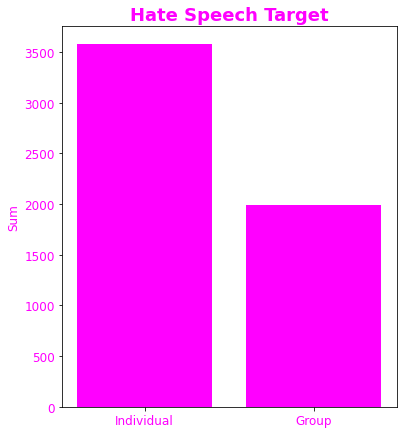

In [79]:
%matplotlib inline
target_HS = ("Individual", "Group")
HS1 = (3575, 1986)

plt.figure(figsize=(6,7))
plt.bar(target_HS, HS1, color='magenta')

plt.title('Hate Speech Target', size=18, fontweight='bold', color='magenta')
plt.ylabel('Sum', size=12, color='magenta')
plt.xticks(size=12, color='magenta')
plt.yticks(size=12, color='magenta')

plt.show()


## Topic and Level of Negative Tweets That Most Discussed

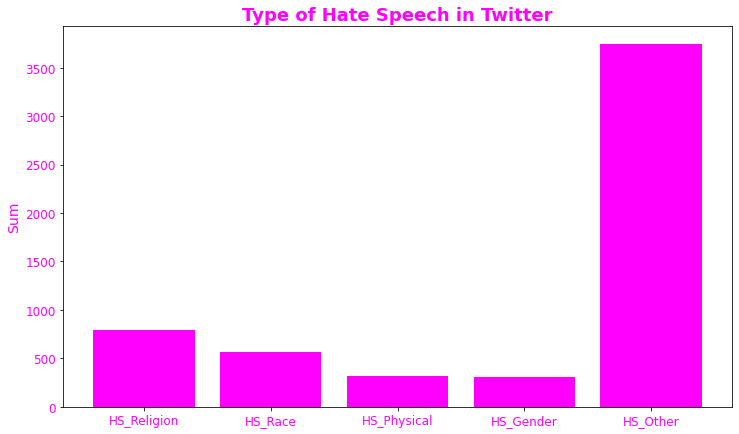

In [102]:
#Type of hatespeech

%matplotlib inline

type_HS = ["HS_Religion", "HS_Race", "HS_Physical", "HS_Gender", "HS_Other"]
count = [793, 566, 323, 306, 3740]


plt.figure(figsize=(12,7))
plt.bar(type_HS, count, color='magenta')

plt.title('Type of Hate Speech in Twitter', size=18, fontweight='bold', color='magenta')
plt.ylabel('Sum', size=14, color='magenta')
plt.xticks(size=12, color='magenta')
plt.yticks(size=12, color='magenta')

plt.show()

Visualize the power of hate speech

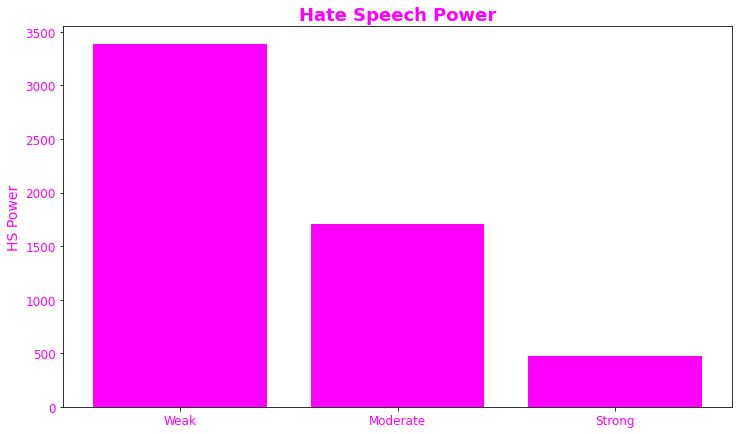

In [56]:
%matplotlib inline

power_HS = ["Weak", "Moderate", "Strong"]
phs = [3383, 1705, 473]


plt.figure(figsize=(12,7))
plt.bar(power_HS, phs, color='magenta')

plt.title('Hate Speech Power', size=18, color='magenta', fontweight='bold')
plt.ylabel('HS Power', size=14, color='magenta')
plt.xticks(size=12, color='magenta')
plt.yticks(size=12, color='magenta')

plt.show()

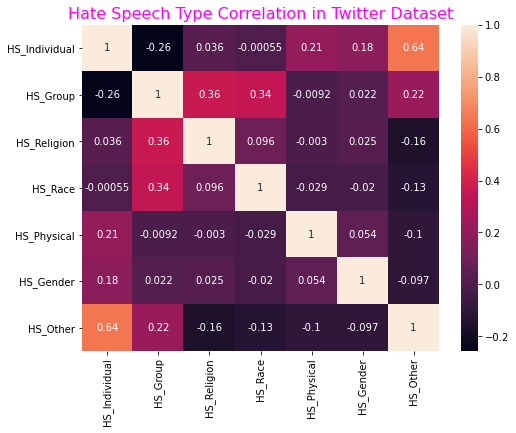

In [66]:
#visualize the correlation using heatmap
type_HS = df_tweet[["HS_Individual", "HS_Group", "HS_Religion", "HS_Race", "HS_Physical", "HS_Gender", "HS_Other"]]
corr = type_HS.corr()
 
# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(type_HS.corr(), annot=True)

plt.title('Hate Speech Type Correlation in Twitter Dataset', size = 16, color='magenta')

plt.show()